Matrix shape: (3546, 3546)
Min distance: 0.00
Max distance: 118.82
Mean distance: 29.21


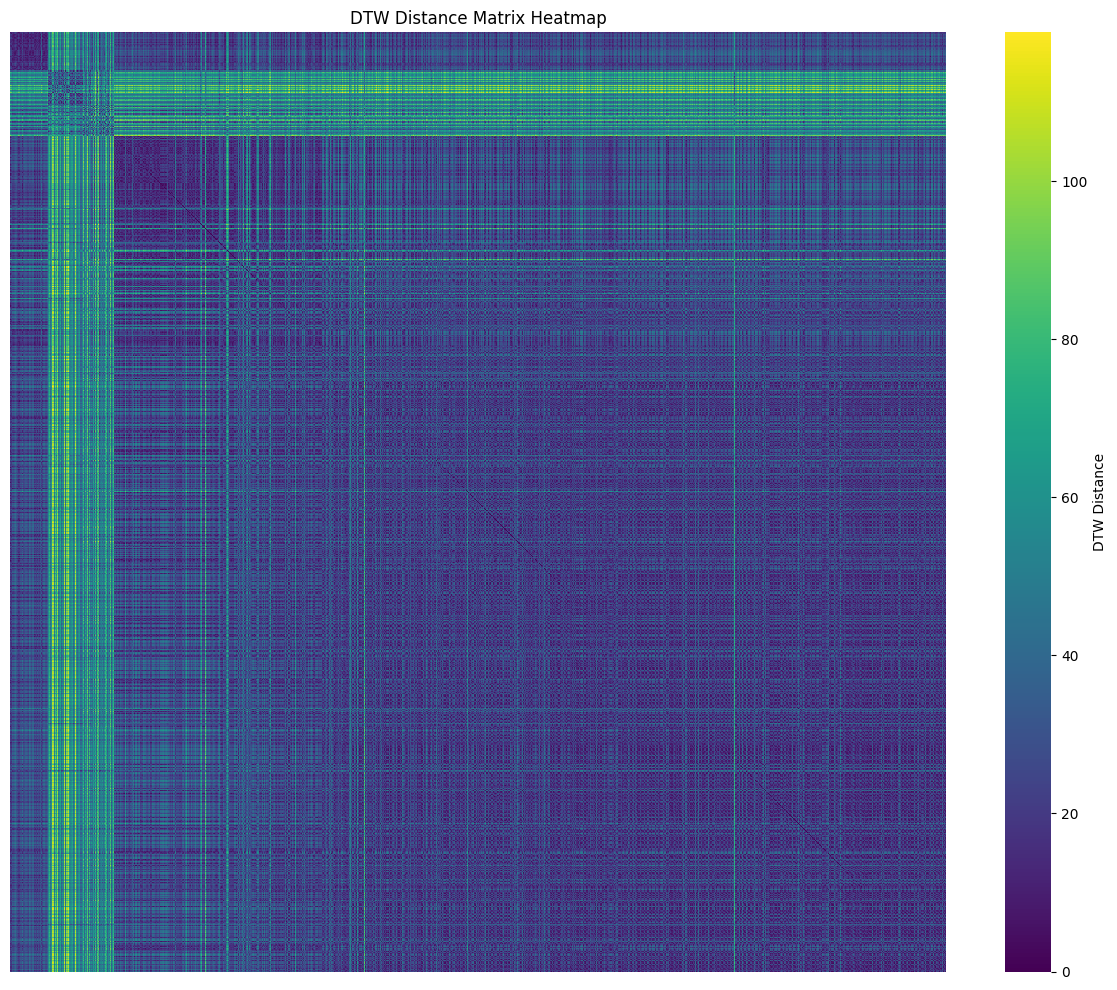

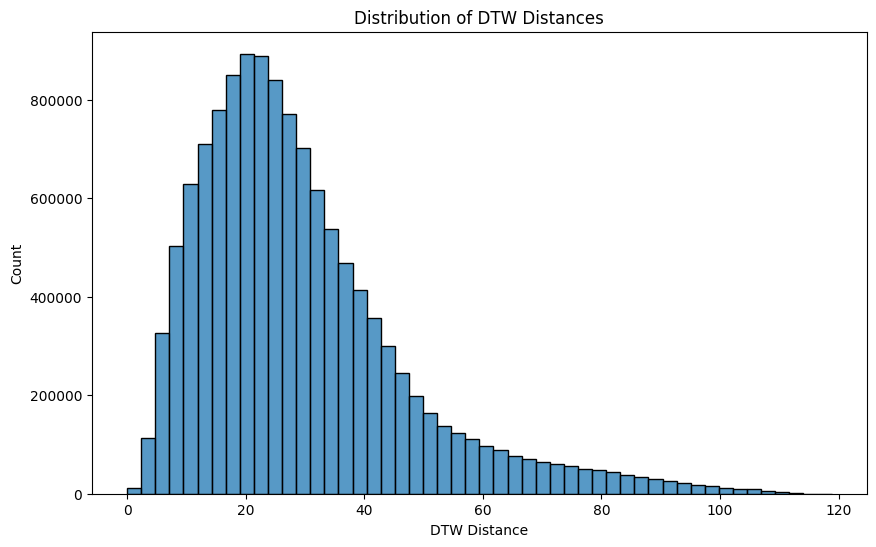

Most similar pairs:
Pair (1090, 1091): Distance = 0.11
Pair (1091, 1090): Distance = 0.11
Pair (752, 751): Distance = 0.16
Pair (751, 752): Distance = 0.16
Pair (679, 680): Distance = 0.18

Most dissimilar pairs:
Pair (2358, 2358): Distance = inf
Pair (2357, 2357): Distance = inf
Pair (2356, 2356): Distance = inf
Pair (2367, 2367): Distance = inf
Pair (3545, 3545): Distance = inf


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Load the distance matrix
matrix_path = "/scr2/shared/pref/datasets/robomimic/can/dtw_matrix_64.pkl"
with open(matrix_path, 'rb') as f:
    distance_matrix, _ = pickle.load(f)

print(f"Matrix shape: {distance_matrix.shape}")
# Take out nans
distance_matrix = np.nan_to_num(distance_matrix)
print(f"Min distance: {distance_matrix.min():.2f}")
print(f"Max distance: {distance_matrix.max():.2f}")
print(f"Mean distance: {distance_matrix.mean():.2f}")

# Create a figure with a larger size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(distance_matrix, 
            cmap='viridis',
            xticklabels=False,
            yticklabels=False,
            cbar_kws={'label': 'DTW Distance'})

plt.title('DTW Distance Matrix Heatmap')
plt.tight_layout()
plt.show()

# Plot the distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(distance_matrix.flatten(), bins=50)
plt.title('Distribution of DTW Distances')
plt.xlabel('DTW Distance')
plt.ylabel('Count')
plt.show()

# Find and plot the most similar and dissimilar pairs
n_samples = 5

# Get the indices of the most similar pairs (excluding self-similarity)
np.fill_diagonal(distance_matrix, np.inf)
most_similar_indices = np.unravel_index(np.argsort(distance_matrix, axis=None)[:n_samples], distance_matrix.shape)

# Get the indices of the most dissimilar pairs
most_dissimilar_indices = np.unravel_index(np.argsort(distance_matrix, axis=None)[-n_samples:], distance_matrix.shape)

print("Most similar pairs:")
for i in range(n_samples):
    idx1, idx2 = most_similar_indices[0][i], most_similar_indices[1][i]
    print(f"Pair ({idx1}, {idx2}): Distance = {distance_matrix[idx1, idx2]:.2f}")

print("\nMost dissimilar pairs:")
for i in range(n_samples):
    idx1, idx2 = most_dissimilar_indices[0][i], most_dissimilar_indices[1][i]
    print(f"Pair ({idx1}, {idx2}): Distance = {distance_matrix[idx1, idx2]:.2f}") 